In [2]:
import torch
import matplotlib.pyplot as plt

In [4]:
sp = torch.linspace(-5, 5, 1000)

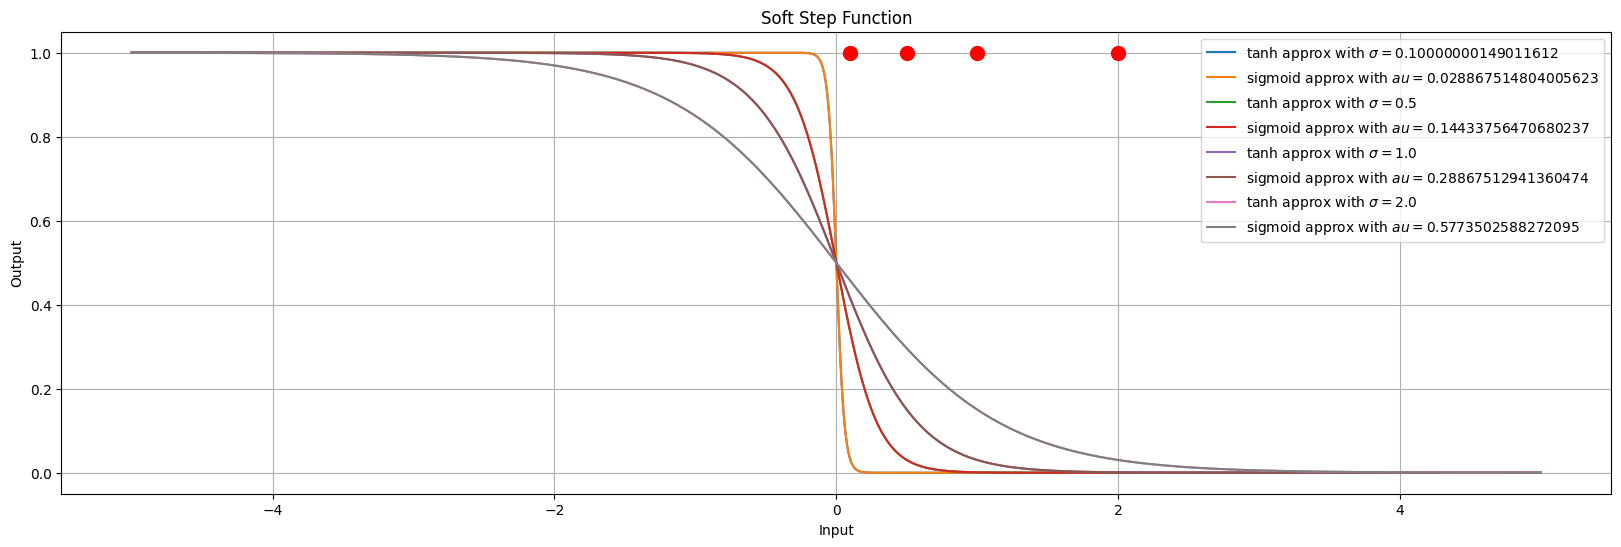

In [ ]:
sigmas = torch.tensor([0.1, 0.5, 1.0, 2.0])
figure = plt.figure(figsize=(20, 6), dpi=100)
for sigma in sigmas:
    gelu = 0.5 * (1 + torch.tanh((-sp / sigma * (3**0.5))))
    gelu = gelu.cpu().numpy()
    plt.plot(sp.cpu().numpy(), gelu, label=f"tanh approx with $\sigma={sigma}$")
    plt.scatter([sigma], [1], color="red", s=100, zorder=5)
    sigmoid_temperature = sigma / (2 * 3**0.5)
    sigmoid = torch.sigmoid(-sp / sigmoid_temperature)
    sigmoid = sigmoid.cpu().numpy()
    plt.plot(sp.cpu().numpy(), sigmoid, label=f"sigmoid approx with $\tau={sigmoid_temperature}$")
plt.title("Soft Step Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()

In [8]:
import lovely_tensors

lovely_tensors.monkey_patch()

tensor[1000] 3.9Kb x∈[0., 5.960e-08] μ=1.492e-10 σ=2.706e-09


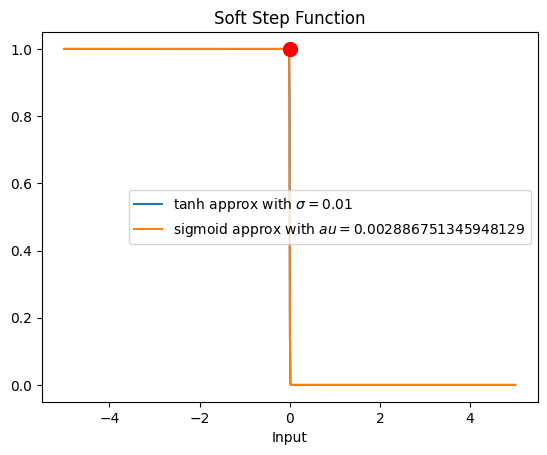

In [9]:
sigma = 0.01
gelu = 0.5 * (1 + torch.tanh((-sp / sigma * (3**0.5))))
sigmoid_temperature = sigma / (2 * 3**0.5)
sigmoid = torch.sigmoid(-sp / sigmoid_temperature)
plt.plot(sp.cpu().numpy(), gelu.cpu().numpy(), label=f"tanh approx with $\sigma={sigma}$")
plt.scatter([sigma], [1], color="red", s=100, zorder=5)
plt.plot(sp.cpu().numpy(), sigmoid.cpu().numpy(), label=f"sigmoid approx with $\tau={sigmoid_temperature}$")
plt.title("Soft Step Function")
plt.legend()
plt.xlabel("Input")
print(torch.abs(gelu - sigmoid))